In [1]:
import pandas as pd
import glob 

In [2]:
files = glob.glob('../data/ninja-trade/*')

In [3]:
files

['../data/ninja-trade\\data.txt',
 '../data/ninja-trade\\debug.txt',
 '../data/ninja-trade\\joined.csv',
 '../data/ninja-trade\\MNQ DEC20.Last15.txt',
 '../data/ninja-trade\\MNQ DEC21.Last16.txt',
 '../data/ninja-trade\\MNQ DEC22.Last17.txt',
 '../data/ninja-trade\\MNQ JUN20.Last8.txt',
 '../data/ninja-trade\\MNQ JUN21.Last9.txt',
 '../data/ninja-trade\\MNQ JUN22.Last10.txt',
 '../data/ninja-trade\\MNQ JUN23.Last1.txt',
 '../data/ninja-trade\\MNQ JUN23.Last3.txt',
 '../data/ninja-trade\\MNQ MAR20.Last4.txt',
 '../data/ninja-trade\\MNQ MAR21.Last5.txt',
 '../data/ninja-trade\\MNQ MAR22.Last6.txt',
 '../data/ninja-trade\\MNQ MAR23.Last.txt',
 '../data/ninja-trade\\MNQ MAR23.Last2.txt',
 '../data/ninja-trade\\MNQ MAR23.Last7.txt',
 '../data/ninja-trade\\MNQ SEP20.Last11.txt',
 '../data/ninja-trade\\MNQ SEP21.Last13.txt',
 '../data/ninja-trade\\MNQ SEP22.Last14.txt']

In [23]:
def load_file(path):
    df = pd.read_csv(path, sep=';', names=['datetime','open','high','low','close','volume'])
    df['datetime'] = pd.to_datetime(df['datetime'])
    df.set_index('datetime', inplace=True)
    return df

In [28]:
dfs = [ load_file(file) for file in files]   

In [29]:
df = pd.concat(dfs)

In [32]:
!head ../data/ninja-trade/joined.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [36]:
df.sort_index(inplace=True)
df

,open,high,low,close,volume
datetime,,,,,
2020-01-01 23:01:00,8773.00,8778.50,8769.50,8773.75,272
2020-01-01 23:02:00,8773.50,8773.75,8770.00,8770.00,118
2020-01-01 23:03:00,8770.00,8772.00,8769.25,8771.00,121
2020-01-01 23:04:00,8771.25,8773.75,8771.25,8773.00,73
2020-01-01 23:05:00,8772.75,8773.00,8771.25,8771.25,46
...,...,...,...,...,...
2023-04-14 20:59:00,13198.50,13202.00,13197.75,13198.50,226
2023-04-14 21:00:00,13198.25,13204.00,13197.75,13199.25,169
2023-04-14 21:00:00,13198.25,13204.00,13197.75,13199.25,169


In [37]:
df.to_csv('../data/ninja-trade/joined.csv')

In [358]:
df = pd.read_csv('../data/ninja-trade/joined.csv')

In [353]:
df = df.iloc[-5519:]

In [359]:
df

,datetime,open,high,low,close,volume
0,2020-01-01 23:01:00,8773.00,8778.50,8769.50,8773.75,272
1,2020-01-01 23:02:00,8773.50,8773.75,8770.00,8770.00,118
2,2020-01-01 23:03:00,8770.00,8772.00,8769.25,8771.00,121
3,2020-01-01 23:04:00,8771.25,8773.75,8771.25,8773.00,73
4,2020-01-01 23:05:00,8772.75,8773.00,8771.25,8771.25,46
...,...,...,...,...,...,...
1222550,2023-04-14 20:59:00,13198.50,13202.00,13197.75,13198.50,226
1222551,2023-04-14 21:00:00,13198.25,13204.00,13197.75,13199.25,169
1222552,2023-04-14 21:00:00,13198.25,13204.00,13197.75,13199.25,169
1222553,2023-04-15 14:18:00,13199.25,13199.25,13199.25,13199.25,2


In [97]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [98]:
df.set_index('datetime', inplace=True)

In [237]:
df

,datetime,open,high,low,close,volume
1212555,2023-04-11 06:42:00,13165.25,13167.50,13165.00,13167.25,40
1212556,2023-04-11 06:42:00,13165.25,13167.50,13165.00,13167.25,40
1212557,2023-04-11 06:43:00,13167.25,13169.00,13167.00,13168.50,138
1212558,2023-04-11 06:43:00,13167.25,13169.00,13167.00,13168.50,138
1212559,2023-04-11 06:44:00,13168.00,13168.50,13167.00,13168.00,52
...,...,...,...,...,...,...
1222550,2023-04-14 20:59:00,13198.50,13202.00,13197.75,13198.50,226
1222551,2023-04-14 21:00:00,13198.25,13204.00,13197.75,13199.25,169
1222552,2023-04-14 21:00:00,13198.25,13204.00,13197.75,13199.25,169
1222553,2023-04-15 14:18:00,13199.25,13199.25,13199.25,13199.25,2


In [115]:
from matplotlib import pyplot as plt

In [286]:
period = 10

In [240]:
data = df['close']

In [184]:
min_df = pd.Series.rolling(data, window=period).min()
mean_df = pd.Series.rolling(data, window=period).mean()
max_df = pd.Series.rolling(data, window=period).max()

num1 = max_df - min_df

tmpValue = ((df['close'] - min_df)/num1 - 0.5)

In [149]:
tmpValue += 0.67*tmpValue.shift(-1)

In [150]:
tmpValue

1222255         NaN
1222256         NaN
1222257         NaN
1222258         NaN
1222259         NaN
             ...   
1222550   -0.667727
1222551   -0.318182
1222552    0.000000
1222553    0.201000
1222554         NaN
Name: close, Length: 300, dtype: float64

In [160]:
fisher = 0.5 * np.log((1+tmpValue)/(1-tmpValue))

In [194]:
df = df.iloc[-5519:]

In [226]:
df

,datetime,open,high,low,close,volume
1221955,2023-04-14 16:02:00,13126.00,13128.75,13123.50,13126.25,848
1221956,2023-04-14 16:02:00,13126.00,13128.75,13123.50,13126.25,848
1221957,2023-04-14 16:03:00,13126.00,13126.75,13119.75,13123.75,1067
1221958,2023-04-14 16:03:00,13126.00,13126.75,13119.75,13123.75,1067
1221959,2023-04-14 16:04:00,13123.25,13123.50,13111.75,13117.00,2849
...,...,...,...,...,...,...
1222550,2023-04-14 20:59:00,13198.50,13202.00,13197.75,13198.50,226
1222551,2023-04-14 21:00:00,13198.25,13204.00,13197.75,13199.25,169
1222552,2023-04-14 21:00:00,13198.25,13204.00,13197.75,13199.25,169
1222553,2023-04-15 14:18:00,13199.25,13199.25,13199.25,13199.25,2


In [348]:
df = pd.read_csv('../data/ninja-trade/data.txt')

In [349]:
df

,close
0,13161.25
1,13161.00
2,13163.25
3,13163.50
4,13162.00
...,...
5514,13203.75
5515,13200.25
5516,13199.50
5517,13198.25


In [222]:
df['close'].iloc[i-period:i].min()

1222544    13200.25
1222545    13199.50
1222546    13199.50
1222547    13198.25
1222548    13198.25
1222549    13198.50
1222550    13198.50
1222551    13199.25
1222552    13199.25
1222553    13199.25
Name: close, dtype: float64

In [223]:
df['close'].iloc[i-period:i].min()

13198.25

In [279]:
1 + 2*3

7

In [304]:
df['close'].iloc[1-period:1].max()

nan

In [354]:

col = 'open'
period = 9
fishPrev = 0
tmpValuePrev = 0
Value = []
tmpSeries = []
for i, v in enumerate(df[col]):
    if i > 0:
        fishPrev = Value[-1]
        tmpValuePrev =  tmpSeries[-1]
    
    min = df[col].iloc[i-period:i+1].min()
    max = df[col].iloc[i-period:i+1].max()
#     if i > 1: break
    if np.isnan(max):
        if i == 0:
            min = v
            max = v
#             print(i, df['close'].iloc[:i+1].values, min)
        else:
            min = df[col].iloc[:i+1].min()
            max = df[col].iloc[:i+1].max()
#             print(i, df['close'].iloc[:i+1].values, min)
    minLo = min
    num1 = max - minLo
    if num1<0.01:
#         print(num1)
        num1=0.025
    trace = f"{i+1} "
    trace += f"In:{v}; max={max} MinLo={minLo}; num1={num1}; tmpValPrev={tmpValuePrev}; fishPrev={fishPrev}"
    tmpValue = 0.66 * ((v - minLo)/num1 - 0.5) + 0.67 * tmpValuePrev
#     print(min,max, num1, tmpValuePrev,tmpValue)
    trace += f"; tmpValue1={tmpValue}"
    if tmpValue > 0.99:
        tmpValue = 0.999
        
    elif tmpValue < -0.99:
        tmpValue = -0.99
    trace += f"; tmpValue2={tmpValue}"
    
#     print(tmpValue)
    tmpSeries.append(tmpValue)
    val = 0.5 * math.log((1+tmpValue)/(1-tmpValue)) + 0.5* fishPrev
    trace += f"; Value={val}"
    print(trace)
    Value.append(val)
#     print(i, v)
#     break

1 In:12955.0; max=12955.0 MinLo=12955.0; num1=0.025; tmpValPrev=0; fishPrev=0; tmpValue1=-0.33; tmpValue2=-0.33; Value=-0.34282825441539394
2 In:12952.5; max=12955.0 MinLo=12952.5; num1=2.5; tmpValPrev=-0.33; fishPrev=-0.34282825441539394; tmpValue1=-0.5511; tmpValue2=-0.5511; Value=-0.7913738721291064
3 In:12952.5; max=12955.0 MinLo=12952.5; num1=2.5; tmpValPrev=-0.5511; fishPrev=-0.7913738721291064; tmpValue1=-0.6992370000000001; tmpValue2=-0.6992370000000001; Value=-1.2614929493509068
4 In:12956.0; max=12956.0 MinLo=12952.5; num1=3.5; tmpValPrev=-0.6992370000000001; fishPrev=-1.2614929493509068; tmpValue1=-0.13848879000000008; tmpValue2=-0.13848879000000008; Value=-0.7701309602229394
5 In:12956.0; max=12956.0 MinLo=12952.5; num1=3.5; tmpValPrev=-0.13848879000000008; fishPrev=-0.7701309602229394; tmpValue1=0.23721251069999993; tmpValue2=0.23721251069999993; Value=-0.14324713996219166
6 In:12955.75; max=12956.0 MinLo=12952.5; num1=3.5; tmpValPrev=0.23721251069999993; fishPrev=-0.14324

1722 In:12976.5; max=12976.5 MinLo=12970.0; num1=6.5; tmpValPrev=0.9762130048868847; fishPrev=4.00939475754077; tmpValue1=0.9840627132742128; tmpValue2=0.9840627132742128; Value=4.416817606740757
1723 In:12976.5; max=12976.5 MinLo=12971.5; num1=5.0; tmpValPrev=0.9840627132742128; fishPrev=4.416817606740757; tmpValue1=0.9893220178937225; tmpValue2=0.9893220178937225; Value=4.822091448781684
1724 In:12977.0; max=12977.0 MinLo=12971.5; num1=5.5; tmpValPrev=0.9893220178937225; fishPrev=4.822091448781684; tmpValue1=0.9928457519887941; tmpValue2=0.999; Value=6.211246891641042
1725 In:12977.0; max=12977.0 MinLo=12975.5; num1=1.5; tmpValPrev=0.999; fishPrev=6.211246891641042; tmpValue1=0.99933; tmpValue2=0.999; Value=6.90582461307072
1726 In:12979.0; max=12979.0 MinLo=12975.5; num1=3.5; tmpValPrev=0.999; fishPrev=6.90582461307072; tmpValue1=0.99933; tmpValue2=0.999; Value=7.25311347378556
1727 In:12979.0; max=12979.0 MinLo=12975.75; num1=3.25; tmpValPrev=0.999; fishPrev=7.25311347378556; tmpVa

2650 In:13201.5; max=13202.25 MinLo=13199.75; num1=2.5; tmpValPrev=-0.65866597468092; fishPrev=-1.81206956550185; tmpValue1=-0.3093062030362165; tmpValue2=-0.3093062030362165; Value=-1.2258128150700367
2651 In:13201.5; max=13201.5 MinLo=13199.75; num1=1.75; tmpValPrev=-0.3093062030362165; fishPrev=-1.2258128150700367; tmpValue1=0.12276484396573498; tmpValue2=0.12276484396573498; Value=-0.4895191877051562
2652 In:13201.5; max=13201.5 MinLo=13199.75; num1=1.75; tmpValPrev=0.12276484396573498; fishPrev=-0.4895191877051562; tmpValue1=0.4122524454570424; tmpValue2=0.4122524454570424; Value=0.1935622367001251
2653 In:13201.5; max=13201.5 MinLo=13199.75; num1=1.75; tmpValPrev=0.4122524454570424; fishPrev=0.1935622367001251; tmpValue1=0.6062091384562185; tmpValue2=0.6062091384562185; Value=0.7996871929109155
2654 In:13200.25; max=13201.5 MinLo=13199.75; num1=1.75; tmpValPrev=0.6062091384562185; fishPrev=0.7996871929109155; tmpValue1=0.264731551337095; tmpValue2=0.264731551337095; Value=0.67103

3575 In:13195.5; max=13195.75 MinLo=13194.5; num1=1.25; tmpValPrev=-0.011227256888562603; fishPrev=-0.3643487991522371; tmpValue1=0.1904777378846631; tmpValue2=0.1904777378846631; Value=0.010658446494215296
3576 In:13196.0; max=13196.0 MinLo=13194.5; num1=1.5; tmpValPrev=0.1904777378846631; fishPrev=0.010658446494215296; tmpValue1=0.4576200843827243; tmpValue2=0.4576200843827243; Value=0.49962602238532283
3577 In:13196.0; max=13196.0 MinLo=13194.5; num1=1.5; tmpValPrev=0.4576200843827243; fishPrev=0.49962602238532283; tmpValue1=0.6366054565364253; tmpValue2=0.6366054565364253; Value=1.002258206963614
3578 In:13197.0; max=13197.0 MinLo=13194.5; num1=2.5; tmpValPrev=0.6366054565364253; fishPrev=1.002258206963614; tmpValue1=0.756525655879405; tmpValue2=0.756525655879405; Value=1.4891698553982056
3579 In:13197.0; max=13197.0 MinLo=13194.5; num1=2.5; tmpValPrev=0.756525655879405; fishPrev=1.4891698553982056; tmpValue1=0.8368721894392015; tmpValue2=0.8368721894392015; Value=1.955227677536434

4485 In:13160.5; max=13166.5 MinLo=13160.5; num1=6.0; tmpValPrev=-0.6047848626318638; fishPrev=-0.8613292209868106; tmpValue1=-0.7352058579633488; tmpValue2=-0.7352058579633488; Value=-1.37062892742615
4486 In:13157.0; max=13166.5 MinLo=13157.0; num1=9.5; tmpValPrev=-0.7352058579633488; fishPrev=-1.37062892742615; tmpValue1=-0.8225879248354437; tmpValue2=-0.8225879248354437; Value=-1.8500832496110582
4487 In:13157.0; max=13166.0 MinLo=13157.0; num1=9.0; tmpValPrev=-0.8225879248354437; fishPrev=-1.8500832496110582; tmpValue1=-0.8811339096397472; tmpValue2=-0.8811339096397472; Value=-2.305857849318371
4488 In:13156.25; max=13166.0 MinLo=13156.25; num1=9.75; tmpValPrev=-0.8811339096397472; fishPrev=-2.305857849318371; tmpValue1=-0.9203597194586306; tmpValue2=-0.9203597194586306; Value=-2.7443028244338303
4489 In:13156.25; max=13164.5 MinLo=13156.25; num1=8.25; tmpValPrev=-0.9203597194586306; fishPrev=-2.7443028244338303; tmpValue1=-0.9466410120372826; tmpValue2=-0.9466410120372826; Value=

5416 In:13188.75; max=13189.0 MinLo=13186.25; num1=2.75; tmpValPrev=0.706857609010401; fishPrev=1.4521266114740286; tmpValue1=0.7435945980369687; tmpValue2=0.7435945980369687; Value=1.6845354701719362
5417 In:13188.75; max=13189.0 MinLo=13186.25; num1=2.75; tmpValPrev=0.7435945980369687; fishPrev=1.6845354701719362; tmpValue1=0.768208380684769; tmpValue2=0.768208380684769; Value=1.858209396679849
5418 In:13190.75; max=13190.75 MinLo=13186.25; num1=4.5; tmpValPrev=0.768208380684769; fishPrev=1.858209396679849; tmpValue1=0.8446996150587953; tmpValue2=0.8446996150587953; Value=2.1664599603937353
5419 In:13190.75; max=13190.75 MinLo=13186.5; num1=4.25; tmpValPrev=0.8446996150587953; fishPrev=2.1664599603937353; tmpValue1=0.895948742089393; tmpValue2=0.895948742089393; Value=2.5345254829158326
5420 In:13190.0; max=13190.75 MinLo=13186.5; num1=4.25; tmpValPrev=0.895948742089393; fishPrev=2.5345254829158326; tmpValue1=0.8138150689645992; tmpValue2=0.8138150689645992; Value=2.405486364598901
5

In [175]:
def fisher_transform(close, period=9):
    # Calculate the midpoint price
    mp = (close + pd.Series.rolling(close, window=period).min() + pd.Series.rolling(close, window=period).max()) / 3
    
    # Calculate the difference between the midpoint price and the close price
    diff = close - mp
    
    # Calculate the maximum and minimum values over the period
    max_diff = pd.Series.rolling(diff.abs(), window=period).max()
    min_diff = pd.Series.rolling(diff.abs(), window=period).min()
    
    # Calculate the relative strength
    rs = (diff - min_diff) / (max_diff - min_diff)
    
    # Calculate the Fisher Transform
    fish = 0.5 * np.log((1 + rs) / (1 - rs))
    
    return fish

In [177]:
fisher = fisher_transform(df['close'])

C:\Users\amatu\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\amatu\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [294]:
Value[-100:]

[2.470077089318698,
 1.417216353064769,
 0.8604919079139837,
 0.5619896464349823,
 0.09669731916568639,
 -0.3659305392121511,
 -0.6218348876089532,
 -0.7665448215966336,
 0.24602631733426478,
 0.9973509012370328,
 1.8919662295927082,
 2.5495798492640094,
 5.074991091882205,
 6.337696713191303,
 6.969049523845851,
 7.284725929173126,
 7.442564131836763,
 7.521483233168581,
 7.5609427838344905,
 7.580672559167445,
 5.679842339966039,
 4.469988013505905,
 3.3442548898452347,
 2.5836870708361515,
 1.6686255674614743,
 0.9522459306171409,
 0.6464007215237938,
 0.5290558249714035,
 0.5587404380469483,
 0.6353012515621217,
 4.117851793031261,
 5.859127063765831,
 4.058802300368545,
 2.8671913171262227,
 1.949355664350768,
 1.3215248108338102,
 0.9899402615962789,
 0.8124203220667345,
 1.1599287342204772,
 1.569191664444805,
 1.9963732857010457,
 2.4246132141315777,
 5.0125077743159885,
 6.306455054408194,
 4.526033058324225,
 3.3592751978937523,
 2.4927681198059415,
 1.9174223567564674,
 0.95

In [355]:
vals = np.array(Value)*3+13160
df['vals'] = vals

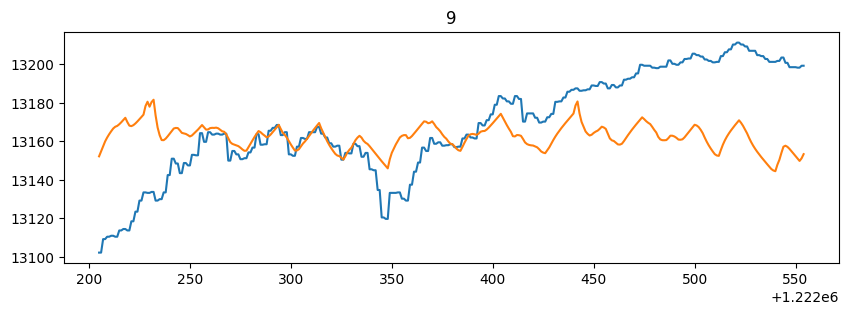

In [356]:
Nback = 350
plt.figure(figsize=(10,3))
plt.plot(df['open'].iloc[-Nback:])
# plt.plot(min_df.iloc[-Nback:], alpha=0.5)
# plt.plot(mean_df.iloc[-Nback:], alpha=0.5)
# plt.plot(max_df.iloc[-Nback:], alpha=0.5)
plt.plot(df['vals'].iloc[-Nback:])
plt.title(str(period))
plt.show()

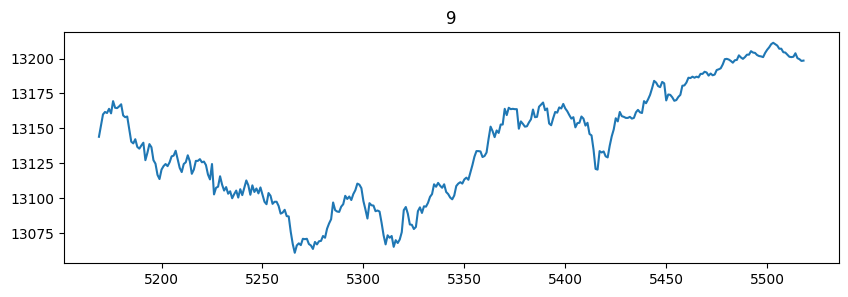

In [351]:
Nback = 350
plt.figure(figsize=(10,3))
plt.plot(df['close'].iloc[-Nback:])
# plt.plot(min_df.iloc[-Nback:], alpha=0.5)
# plt.plot(mean_df.iloc[-Nback:], alpha=0.5)
# plt.plot(max_df.iloc[-Nback:], alpha=0.5)
# plt.plot(df['vals'].iloc[-Nback:])
plt.title(str(period))
plt.show()

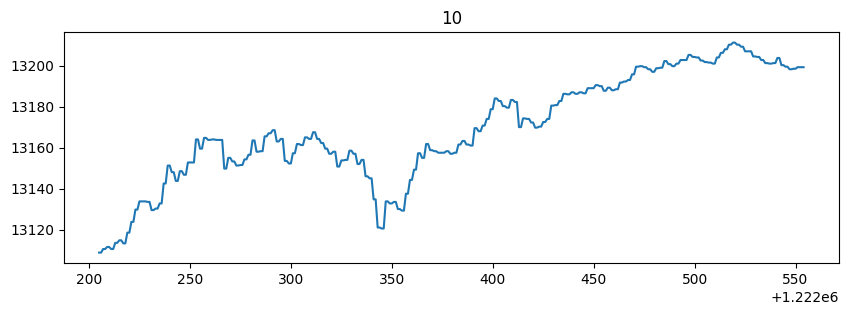

In [275]:
Nback = 350
plt.figure(figsize=(10,3))
plt.plot(df['close'].iloc[-Nback:])
# plt.plot(min_df.iloc[-Nback:], alpha=0.5)
# plt.plot(mean_df.iloc[-Nback:], alpha=0.5)
# plt.plot(max_df.iloc[-Nback:], alpha=0.5)
plt.plot(df['vals'].iloc[-Nback:])
plt.title(str(period))
plt.show()

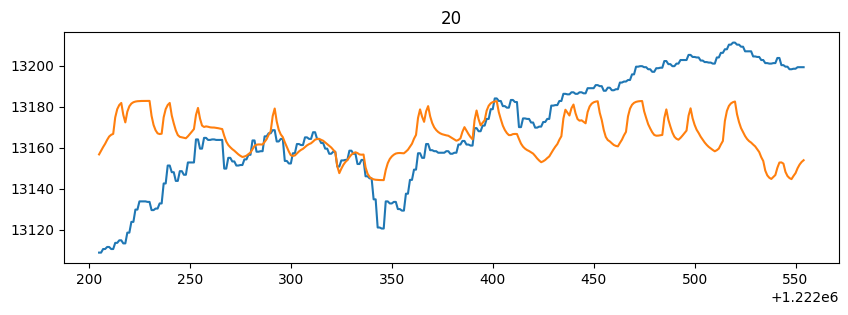

In [265]:
Nback = 350
plt.figure(figsize=(10,3))
plt.plot(df['close'].iloc[-Nback:])
# plt.plot(min_df.iloc[-Nback:], alpha=0.5)
# plt.plot(mean_df.iloc[-Nback:], alpha=0.5)
# plt.plot(max_df.iloc[-Nback:], alpha=0.5)
plt.plot(df['vals'].iloc[-Nback:])
plt.title(str(period))
plt.show()

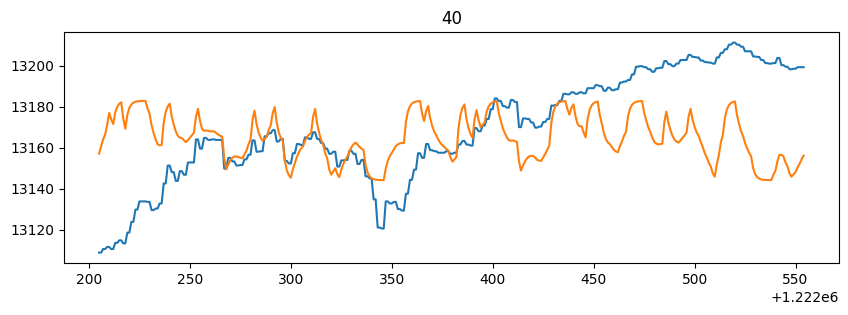

In [270]:
Nback = 350
plt.figure(figsize=(10,3))
plt.plot(df['close'].iloc[-Nback:])
# plt.plot(min_df.iloc[-Nback:], alpha=0.5)
# plt.plot(mean_df.iloc[-Nback:], alpha=0.5)
# plt.plot(max_df.iloc[-Nback:], alpha=0.5)
plt.plot(df['vals'].iloc[-Nback:])
plt.title(str(period))
plt.show()

In [244]:
len(Value)

10000

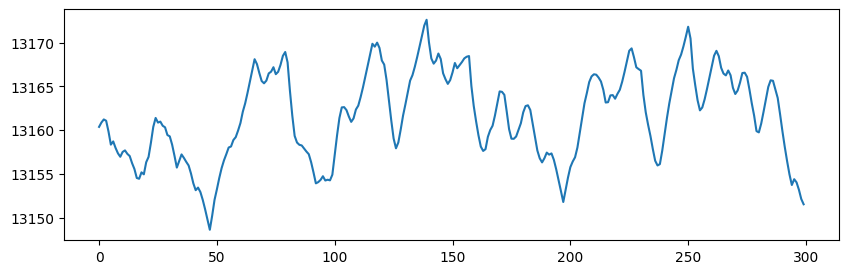

In [339]:
plt.figure(figsize=(10,3))
plt.plot(vals[-300:])

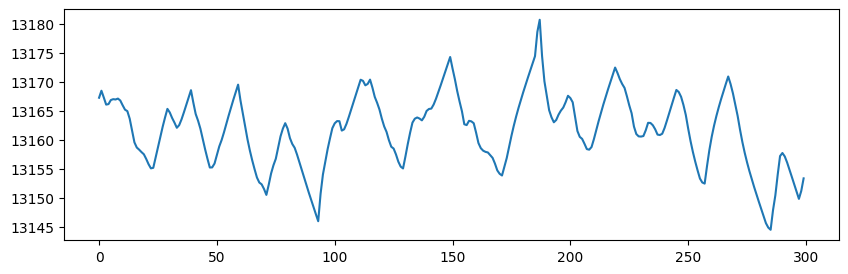

In [357]:
plt.figure(figsize=(10,3))
plt.plot(vals[-300:])